In [158]:
import torch
from torch.autograd import Variable
from torchvision import models, datasets, transforms

import numpy as np

import os, sys

from pytorch_utils import set_gpu, get_model, get_input_size, get_transform_detransform, get_data_loader

from vanilla_backprop import run_vanilla_backprop, get_first_module_name

#from scipy.misc import imread
from PIL import Image

import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
gpu = 0
cuda = set_gpu(gpu)

1 GPU(s) being used at the following index(es): 0


Visualizing imagenet class scorpion (72)


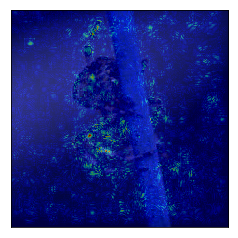

In [100]:
image_path='../input_images/spider.png'
dataset='imagenet'
arch='alexnet'
layer='features.0'
target_class=72
visualize=True

size=get_input_size(dataset, arch)[-1]
transform, detransform = get_transform_detransform(dataset=dataset, size=size, train=False)

viz = run_vanilla_backprop(image=image_path, arch=arch, dataset=dataset, layer=layer, target_class=target_class, 
                           visualize=visualize, cuda=cuda)

In [109]:
mnist_loader = get_data_loader(dataset='mnist', train=True, batch_size=64, shuffle=False, normalize=False)

In [117]:
(x, y) = next(iter(mnist_loader))

Visualizing mnist class index 5


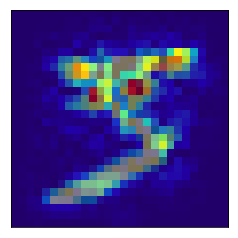

In [116]:
image_path=x[0].unsqueeze(0)
dataset='mnist'
arch='lenet'
layer=None
target_class=y[0]
visualize=True

size=get_input_size(dataset, arch)[-1]
transform, detransform = get_transform_detransform(dataset=dataset, size=size, train=False)

viz = run_vanilla_backprop(image=image_path, arch=arch, dataset=dataset, layer=layer, target_class=target_class, 
                           visualize=visualize, cuda=cuda)

In [119]:
sys.path.append('/home/ruthfong/pytorch/vision/torchvision/datasets')

In [131]:
from aircraft import FGVCAircraft

In [186]:
dset = FGVCAircraft(root='/home/ruthfong/data/datasets/fgvc-aircraft-2013b/', 
                    transform=transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()]))

In [187]:
from torch.utils.data import DataLoader

In [188]:
loader = DataLoader(dset, batch_size=64, shuffle=False)

In [189]:
(x, y) = next(iter(loader))

In [190]:
x.shape

torch.Size([64, 3, 224, 224])

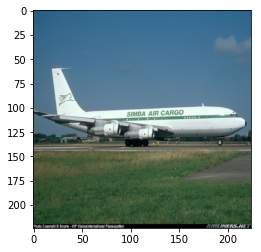

In [193]:
f, ax = plt.subplots(1,1)
ax.imshow(transforms.ToPILImage()(x[6]))
plt.show()

In [195]:
from torchvision.datasets import ImageFolder

In [197]:
x = ImageFolder('/home/ruthfong/data/datasets/fgvc-aircraft-2013b/')

In [201]:
x.__repr__()

'<torchvision.datasets.folder.ImageFolder object at 0x7fab10672390>'

In [204]:
root = '~/test'
url = 'http://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/archives/fgvc-aircraft-2013b.tar.gz'

In [208]:
from six.moves import urllib
from urllib import urlretrieve

In [214]:
tmp = os.path.expanduser(root) + '.tar.gz'
data = urllib.request.urlopen(url)

#file_tmp = urlretrieve(url, filename=None)[0]

In [221]:
filename = url.rpartition('/')[-1]

In [222]:
with open(tmp, 'wb') as f:
    f.write(data.read())